In [1]:
!pip install -q git+https://github.com/chris-lawrence-cd/winepredict.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 19.3 MB/s eta 0:00:00


In [2]:
# Import necessary functions from the library
from winepredict.data_processing import preprocess_and_analyze_data, process_fred_data
from winepredict.model_training import train_and_evaluate_models, tune_and_evaluate_catboost
from winepredict.model_evaluation import evaluate_model, cross_validate_model
from winepredict.visualization import plot_actual_vs_predicted, visualize_residuals, plot_feature_importance
from winepredict import info

import numpy as np
import random
from sklearn.model_selection import train_test_split

# Define FRED API key
api_key = 'db26981c344747951316ccd9c7d01f0d'

# Set seed for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

In [3]:
# Print library information
info()


██╗    ██╗██╗███╗   ██╗███████╗    ██████╗ ██████╗ ███████╗██████╗ ██╗ ██████╗████████╗
██║    ██║██║████╗  ██║██╔════╝    ██╔══██╗██╔══██╗██╔════╝██╔══██╗██║██╔════╝╚══██╔══╝
██║ █╗ ██║██║██╔██╗ ██║█████╗      ██████╔╝██████╔╝█████╗  ██║  ██║██║██║        ██║   
██║███╗██║██║██║╚██╗██║██╔══╝      ██╔═══╝ ██╔══██╗██╔══╝  ██║  ██║██║██║        ██║   
╚███╔███╔╝██║██║ ╚████║███████╗    ██║     ██║  ██║███████╗██████╔╝██║╚██████╗   ██║   
 ╚══╝╚══╝ ╚═╝╚═╝  ╚═══╝╚══════╝    ╚═╝     ╚═╝  ╚═╝╚══════╝╚═════╝ ╚═╝ ╚═════╝   ╚═╝   

Welcome to the WinePredict library!
This library provides tools for predicting wine prices using various machine learning models.
It includes functions for data processing, model training, evaluation, and visualization.
Use this library to build, train, and evaluate models to forecast wine prices based on economic indicators.


In [4]:
# Step 1: Download and process FRED data
process_fred_data(api_key)

# Step 2: Preprocess and analyze data
file_path = 'FRED_Data.xlsx'
scaled_df = preprocess_and_analyze_data(file_path, output_file='correlation_matrix.png')

# Step 3: Train and evaluate multiple models
results_df = train_and_evaluate_models(scaled_df)

Data downloaded, filtered, resampled to monthly frequency, and saved to FRED_Data.xlsx.
Linear Regression trained.
Ridge Regression trained.
Lasso Regression trained.
Neural Network trained.
Support Vector Machine (RBF Kernel) trained.
Decision Tree trained.
Random Forest trained.
Gradient Boosting trained.
XGBoost trained.
LightGBM trained.
CatBoost trained.
------------------
Model Performance:
                                           R²  Adjusted R²      RMSE       MAE
Linear Regression                    0.864552     0.867938  1.036808  0.805231
Ridge Regression                     0.865123     0.868495  1.034622  0.807330
Lasso Regression                     0.555660     0.566769  1.877889  1.750686
Neural Network                       0.899410     0.901924  0.893492  0.619923
Support Vector Machine (RBF Kernel)  0.914350     0.916491  0.824472  0.547540
Decision Tree                        0.836789     0.840869  1.138119  0.629924
Random Forest                        0.906159  

In [5]:
# Step 4: Tune and evaluate CatBoost model
X = scaled_df.drop(['Average Wine Price'], axis=1)
y = scaled_df['Average Wine Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
catboost_results = tune_and_evaluate_catboost(X_train, y_train, X_test, y_test)
best_catboost = catboost_results['best_estimator']

Best CatBoost parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.05}
Best CatBoost R²: 0.92262
Best CatBoost RMSE: 0.78365
Best CatBoost MAE: 0.51911


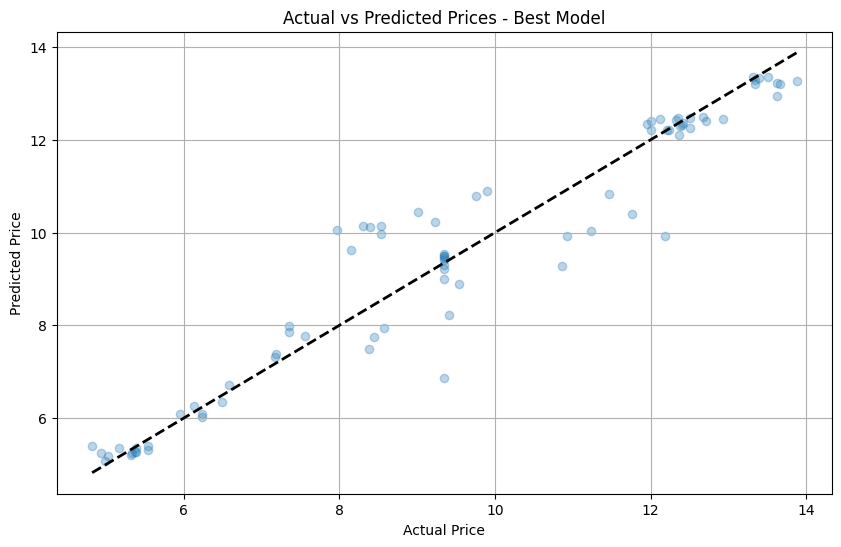

In [6]:
# Plot actual vs. predicted prices for the best model
plot_actual_vs_predicted(y_test, best_catboost.predict(X_test))

In [7]:
# Evaluate the best model on training and testing data
evaluate_model(best_catboost, X_train, X_test, y_train, y_test)

Train Adjusted R²: 0.94504, Test Adjusted R²: 0.89941
Train RMSE: 0.66767, Test RMSE: 0.78365
Train MAE: 0.46647, Test MAE: 0.51911


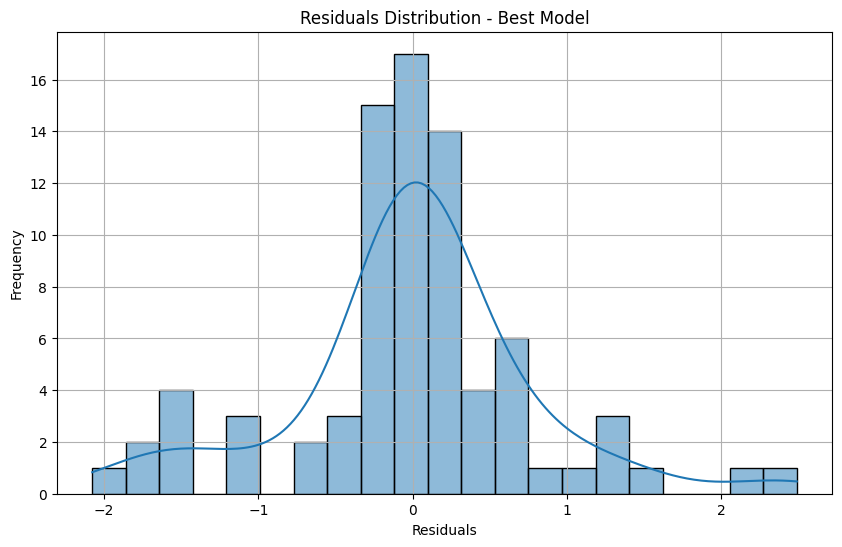

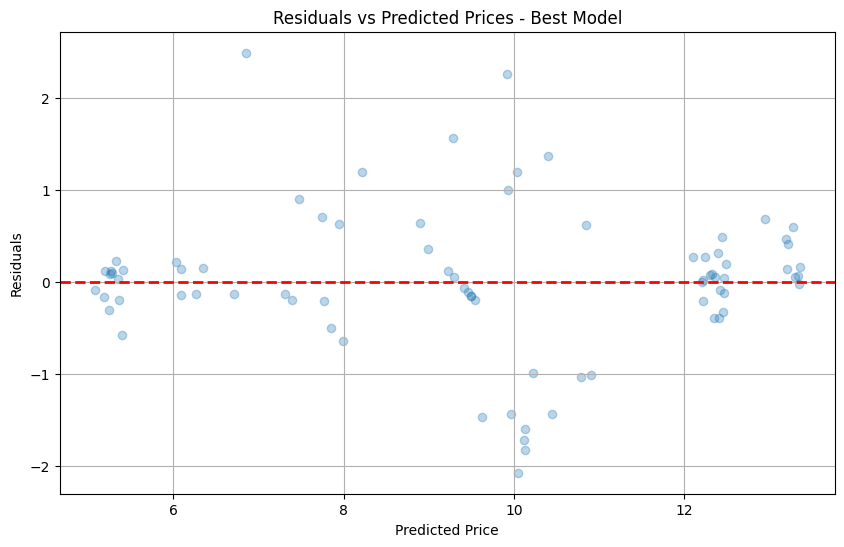

In [8]:
# Visualize residuals
visualize_residuals(y_test, best_catboost.predict(X_test))

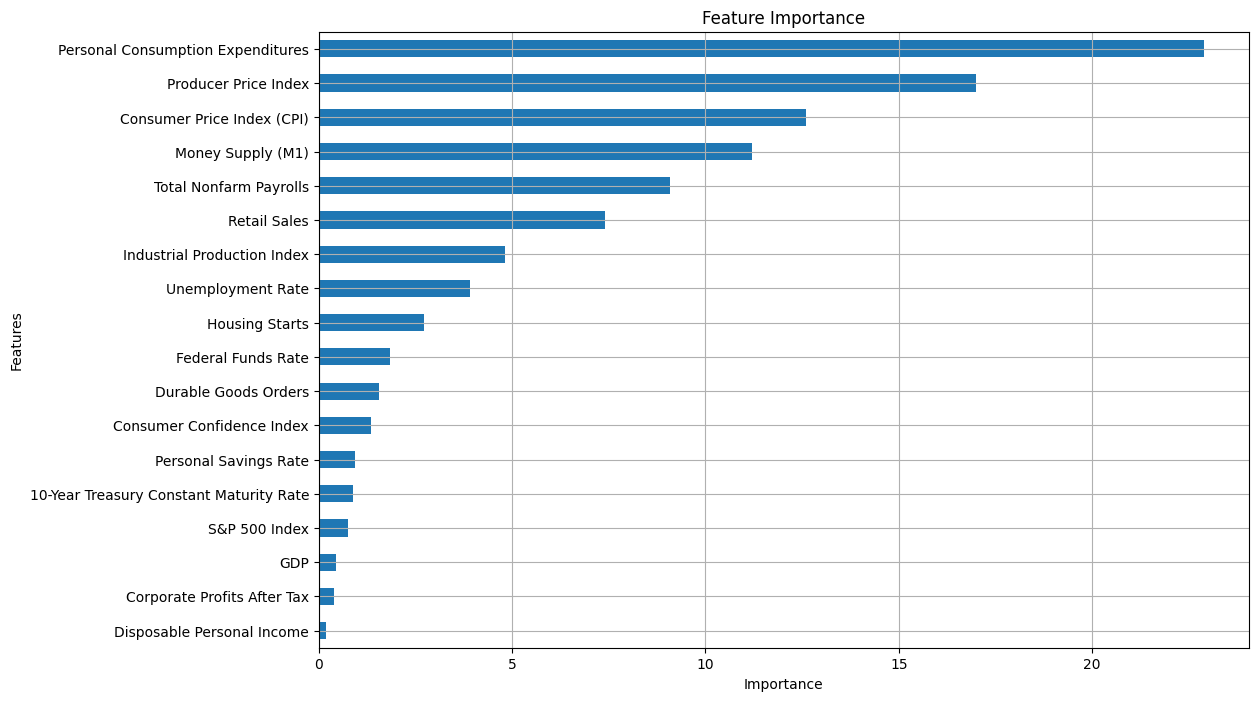

In [9]:
# Plot feature importance
plot_feature_importance(catboost_results['ranked_feature_importance'])